In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import folium
import pandas as pd

In [63]:
df_BarcelonaSept24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB06Sep24.csv')
df_BarcelonaJune24 =pd.read_csv(r'C:\Users\alber\Downloads\listingsB15June24.csv')
df_BarcelonaMarch24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB20March24.csv')
df_BarcelonaDec23 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB13Dec23.csv')
df_SevillaJune24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsS30June24.csv')
df_SevillaMarch24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsS31March24.csv')
df_SevillaDec23 = pd.read_csv(r'C:\Users\alber\Downloads\listingsS29Dec23.csv')
df_MadridSept24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM11Sep24.csv')
df_MadridJune24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM15June24.csv')
df_MadridMarch24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM22March24.csv')
df_MadridDec23 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM15Dec23.csv')


In [64]:
df_BSept24_copia = df_BarcelonaSept24.copy()
df_BMarch24_copia = df_BarcelonaMarch24.copy()
df_BJune24_copia = df_BarcelonaJune24.copy()
df_BDec23_copia = df_BarcelonaDec23.copy()

df_MDec23_copia = df_MadridDec23.copy()
df_MJune24_copia = df_MadridJune24.copy()
df_MSept24_copia = df_MadridSept24.copy()
df_MMarch24_copia = df_MadridMarch24.copy()

df_SJune24_copia = df_SevillaJune24.copy()
df_SMarch24_copia = df_SevillaMarch24.copy()
df_SDec23_copia = df_BarcelonaDec23.copy()

df_BSept24_copia['month'] = 'September'
df_BMarch24_copia['month'] = 'March'
df_BJune24_copia['month'] = 'June'
df_BDec23_copia['month'] = 'December'  

df_MDec23_copia['month'] = 'December'
df_MJune24_copia['month'] = 'June'
df_MSept24_copia['month'] = 'September'
df_MMarch24_copia['month'] = 'March'

df_SJune24_copia['month'] = 'June'
df_SMarch24_copia['month'] = 'March'
df_SDec23_copia['month'] = 'December'

df_BSept24_copia['state'] = 'Barcelona'
df_BMarch24_copia['state'] = 'Barcelona'
df_BJune24_copia['state'] = 'Barcelona'
df_BDec23_copia['state'] = 'Barcelona'  

df_MDec23_copia['state'] = 'Madrid'
df_MJune24_copia['state'] = 'Madrid'
df_MSept24_copia['state'] = 'Madrid'
df_MMarch24_copia['state'] = 'Madrid'

df_SJune24_copia['state'] = 'Sevilla'
df_SMarch24_copia['state'] = 'Sevilla'
df_SDec23_copia['state'] = 'Sevilla'

df_concatenado_total = pd.concat([df_BSept24_copia, df_BMarch24_copia, df_BJune24_copia, df_BDec23_copia, df_MSept24_copia, df_MMarch24_copia, df_MJune24_copia, df_MDec23_copia, df_SMarch24_copia, df_SJune24_copia, df_SDec23_copia ], ignore_index=True)

df_concatenado_total.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214637 entries, 0 to 214636
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              214637 non-null  int64  
 1   name                            214637 non-null  object 
 2   host_id                         214637 non-null  int64  
 3   host_name                       214605 non-null  object 
 4   neighbourhood_group             214637 non-null  object 
 5   neighbourhood                   214637 non-null  object 
 6   latitude                        214637 non-null  float64
 7   longitude                       214637 non-null  float64
 8   room_type                       214637 non-null  object 
 9   price                           177265 non-null  float64
 10  minimum_nights                  214637 non-null  int64  
 11  number_of_reviews               214637 non-null  int64  
 12  last_review     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214637 entries, 0 to 214636
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              214637 non-null  int64  
 1   name                            214637 non-null  object 
 2   host_id                         214637 non-null  int64  
 3   host_name                       214605 non-null  object 
 4   neighbourhood_group             214637 non-null  object 
 5   neighbourhood                   214637 non-null  object 
 6   latitude                        214637 non-null  float64
 7   longitude                       214637 non-null  float64
 8   room_type                       214637 non-null  object 
 9   price                           177265 non-null  float64
 10  minimum_nights                  214637 non-null  int64  
 11  number_of_reviews               214637 non-null  int64  
 12  last_review     

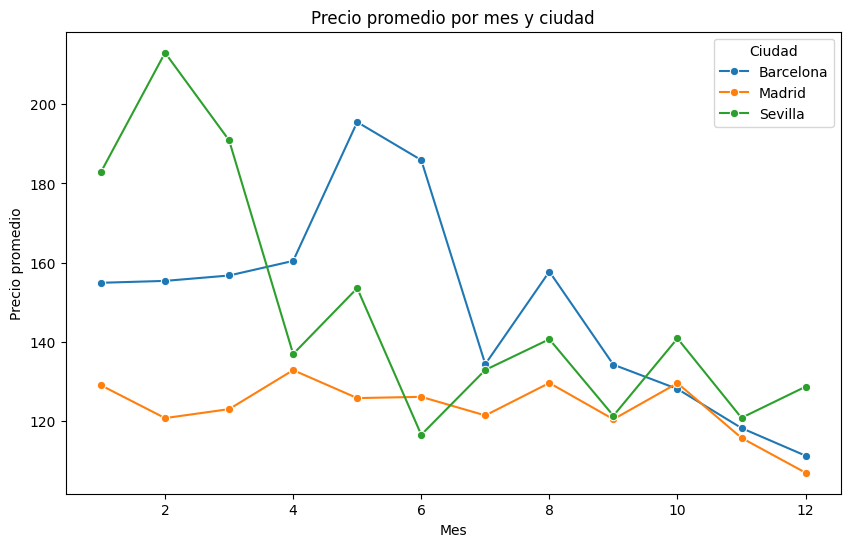

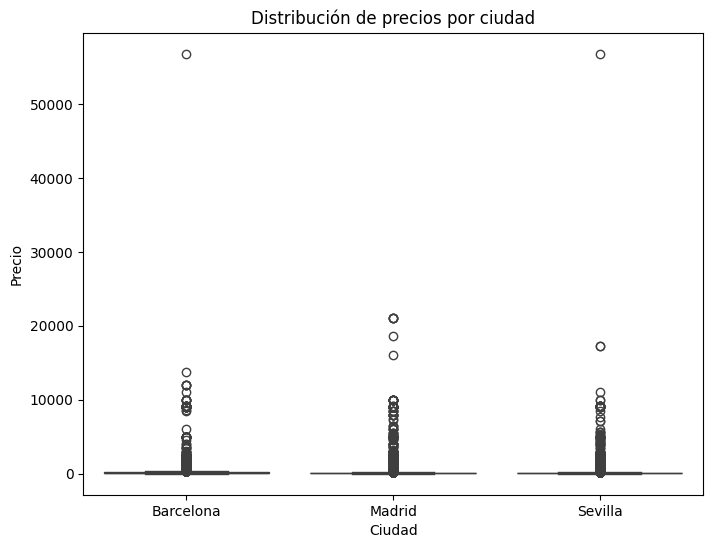

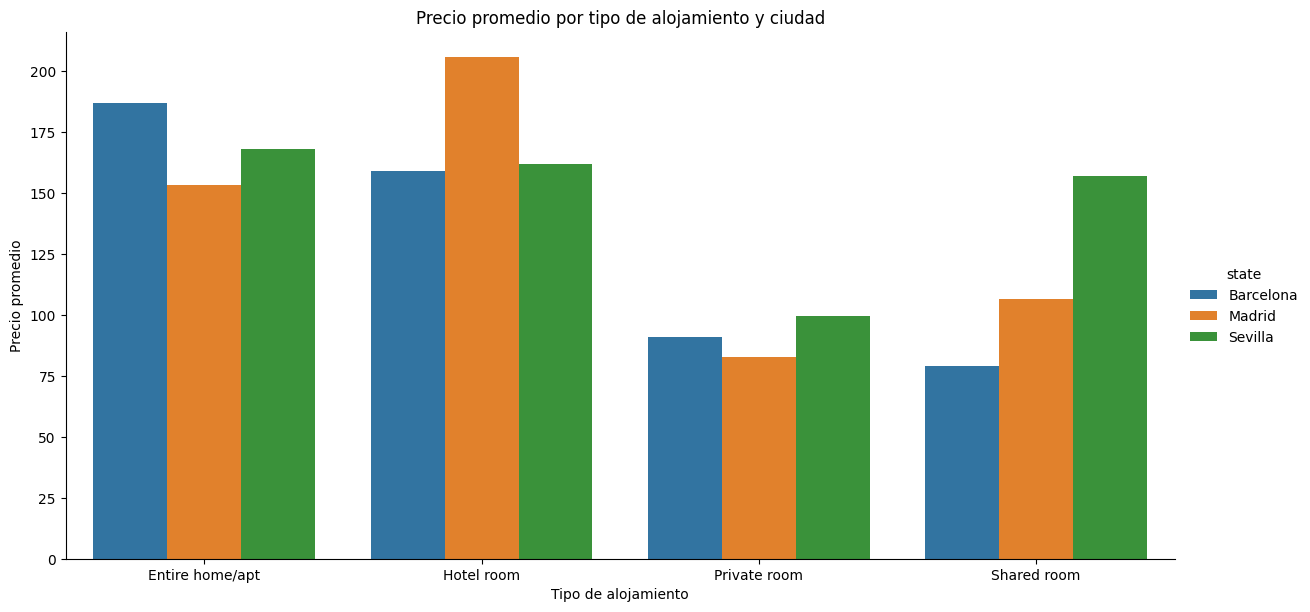

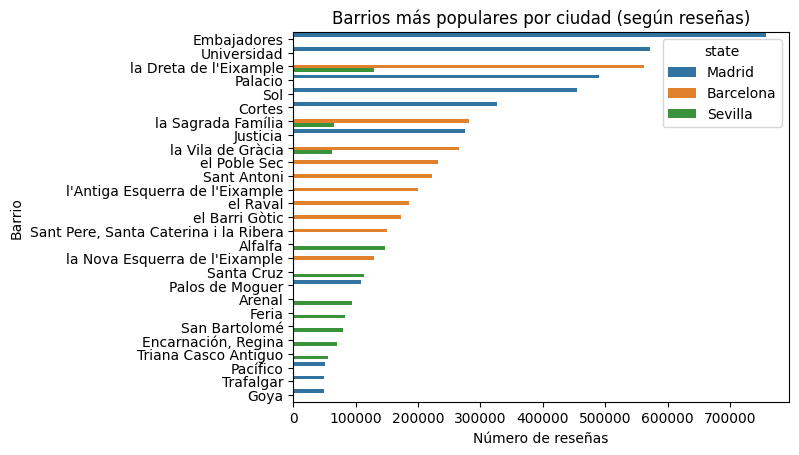

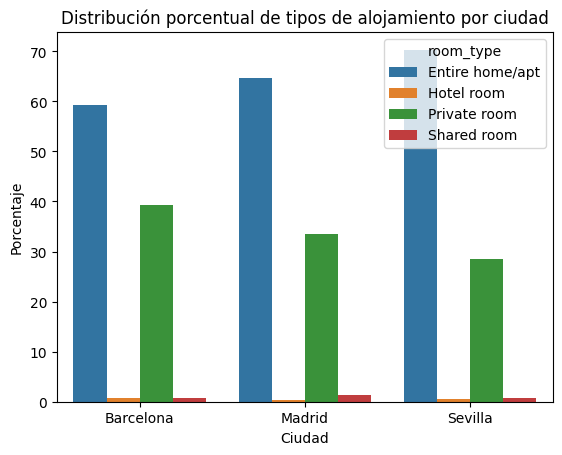

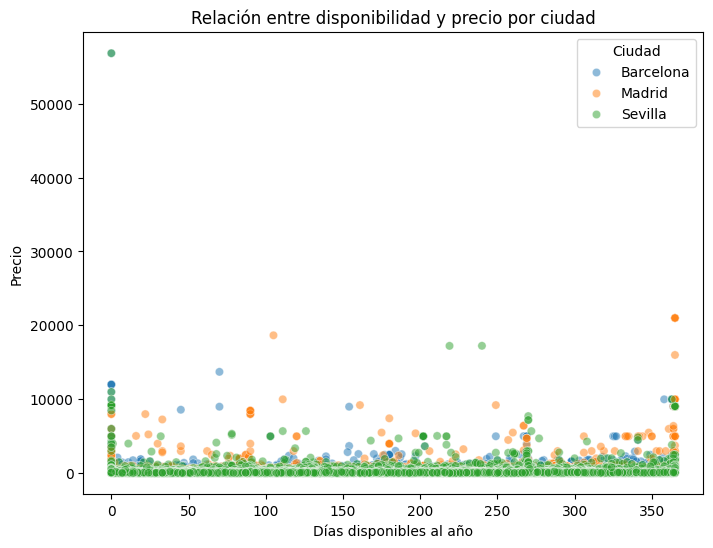

Top 10 Hosts más activos:
          host_id  total_listings   avg_price
19931  346367515            2938  152.555820
20148  357946540            1623   51.965496
20443  377605855            1192  204.449664
18760  291253690            1154  173.522530
6846    32037490            1086  207.194291
509      1447144             957  430.632184
1768     4459553             929  251.417653
24678  518713670             893   69.647256
21663  434208714             777  130.301158
21758  438136382             763  132.186107


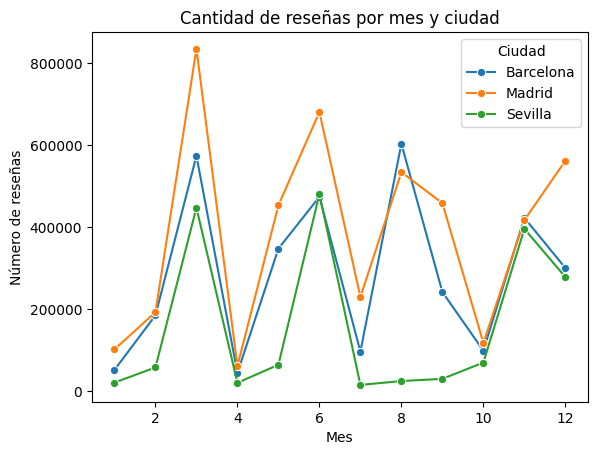

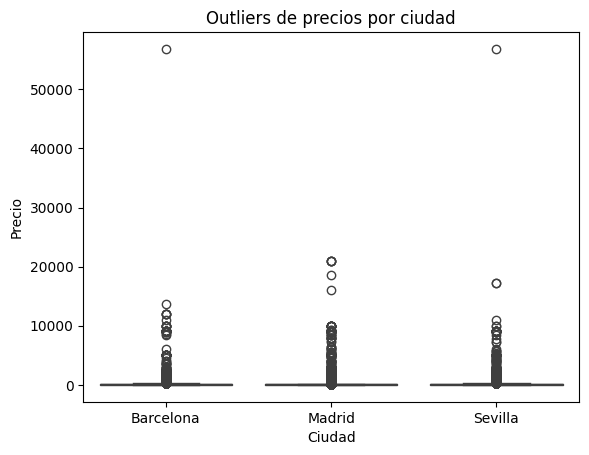

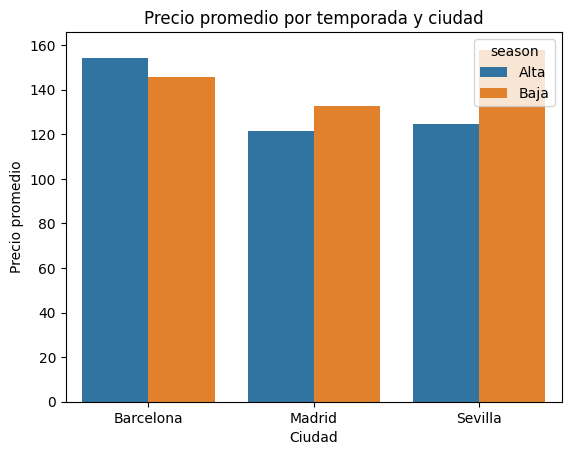



=== Análisis para Barcelona ===



C:\Users\alber\AppData\Local\Temp\ipykernel_15008\3167126616.py:244: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='season', y='price', palette='coolwarm')


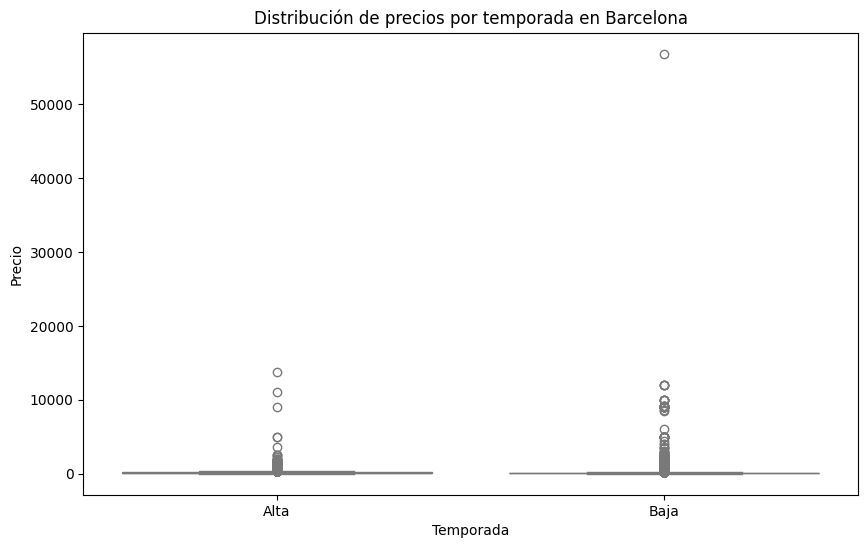

T-test (Barcelona): t-stat = 3.21, p-value = 0.00133
Mann-Whitney U (Barcelona): U-stat = 655807141.00, p-value = 0.00000


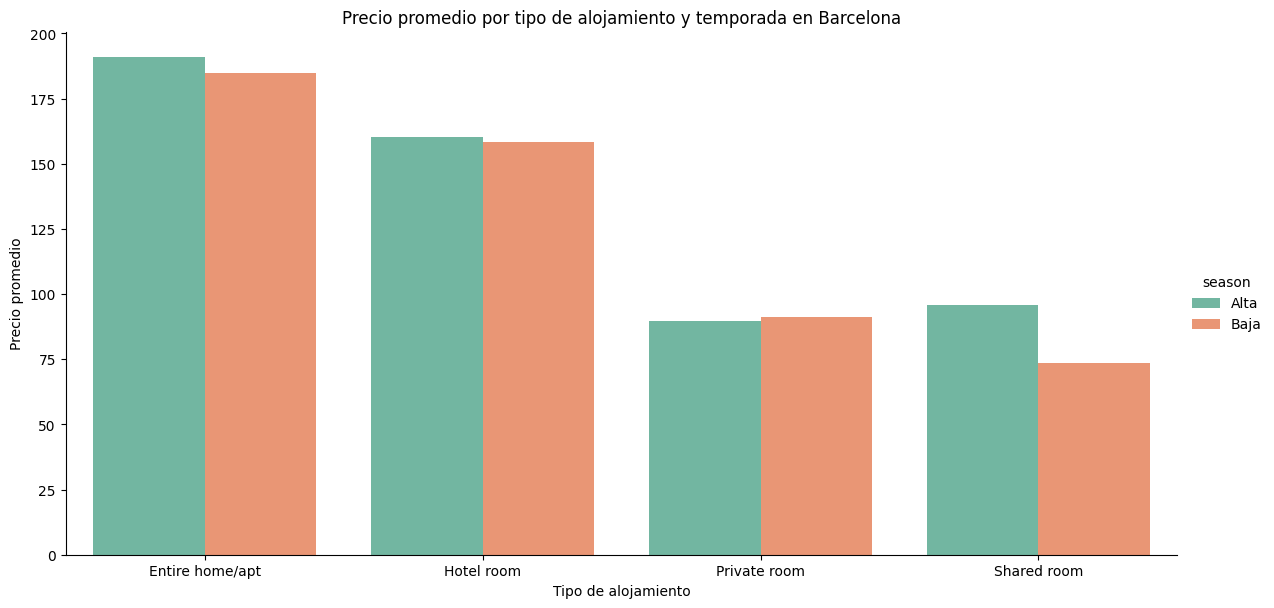

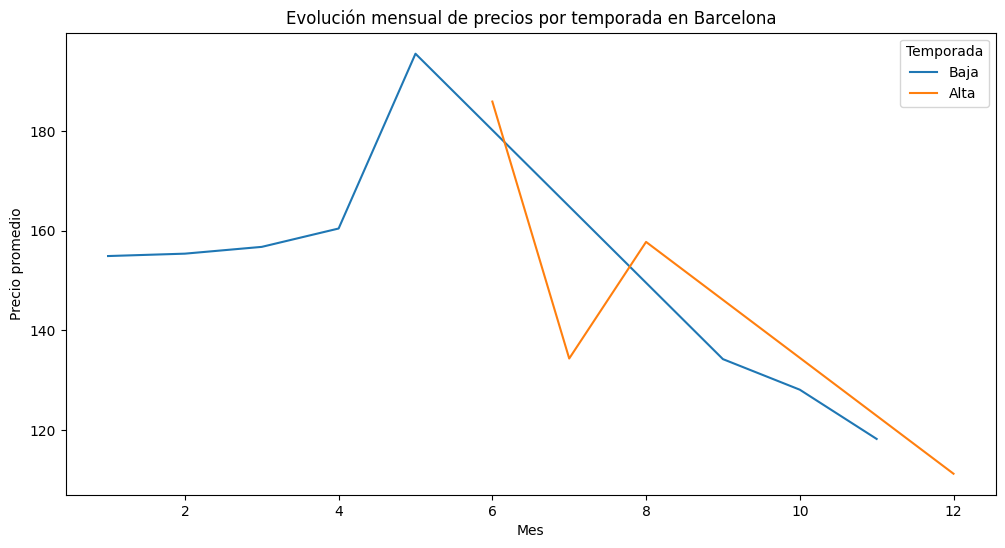

C:\Users\alber\AppData\Local\Temp\ipykernel_15008\3167126616.py:289: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='season', y='price', palette='coolwarm')


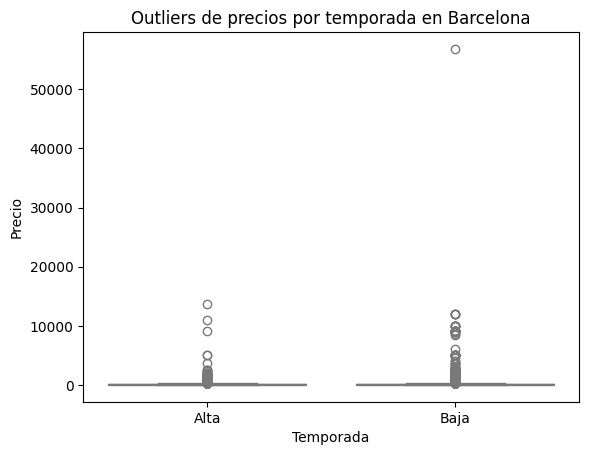

En Barcelona, los precios en temporadas altas son significativamente diferentes de los precios en temporadas bajas (T-test).
La prueba no paramétrica confirma diferencias significativas en los precios en Barcelona (Mann-Whitney U).


=== Análisis para Madrid ===



C:\Users\alber\AppData\Local\Temp\ipykernel_15008\3167126616.py:244: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='season', y='price', palette='coolwarm')


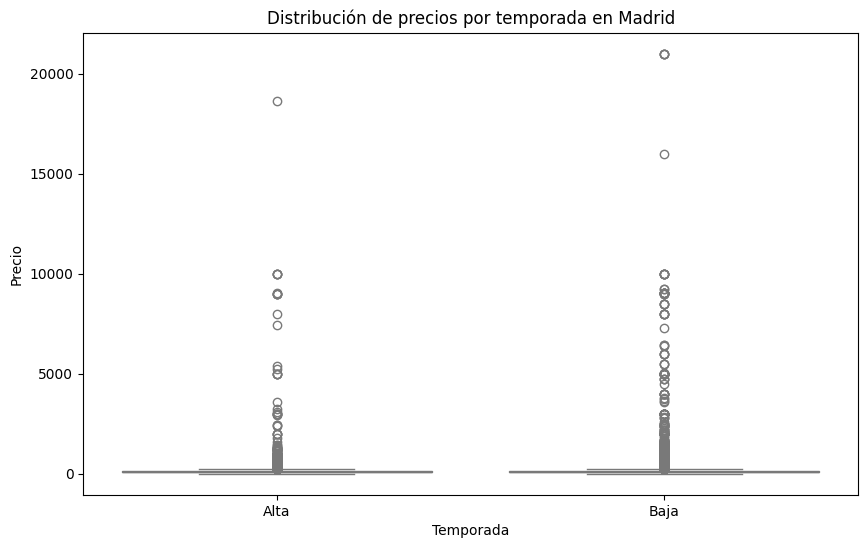

T-test (Madrid): t-stat = -6.18, p-value = 0.00000
Mann-Whitney U (Madrid): U-stat = 1203809113.50, p-value = 0.00013


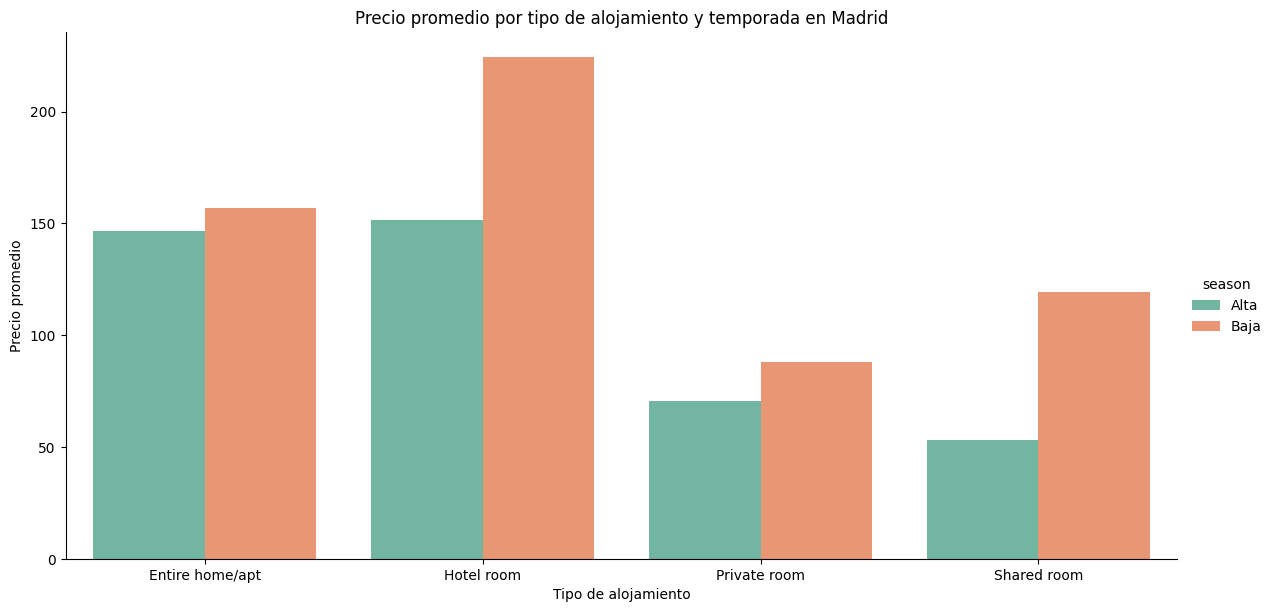

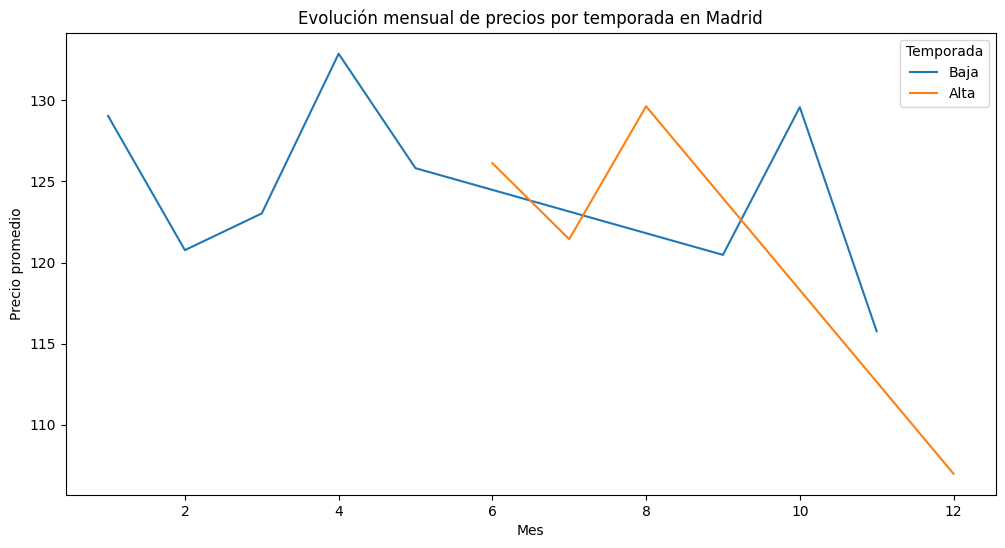

C:\Users\alber\AppData\Local\Temp\ipykernel_15008\3167126616.py:289: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='season', y='price', palette='coolwarm')


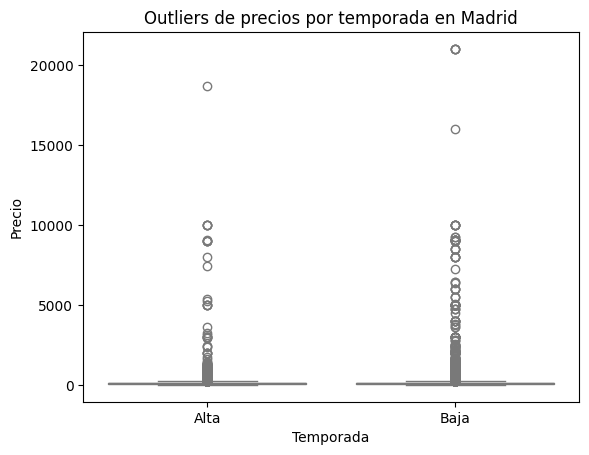

En Madrid, los precios en temporadas altas son significativamente diferentes de los precios en temporadas bajas (T-test).
La prueba no paramétrica confirma diferencias significativas en los precios en Madrid (Mann-Whitney U).


=== Análisis para Sevilla ===



C:\Users\alber\AppData\Local\Temp\ipykernel_15008\3167126616.py:244: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='season', y='price', palette='coolwarm')


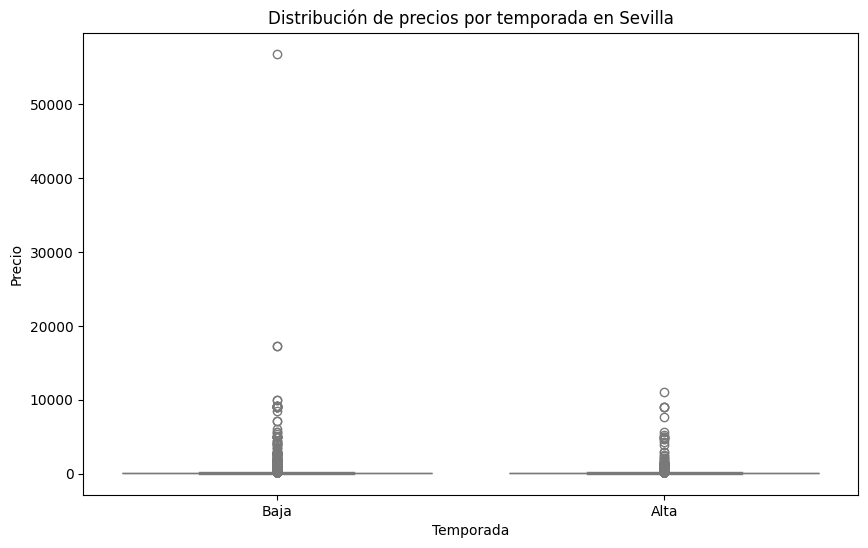

T-test (Sevilla): t-stat = -6.11, p-value = 0.00000
Mann-Whitney U (Sevilla): U-stat = 101729485.00, p-value = 0.00000


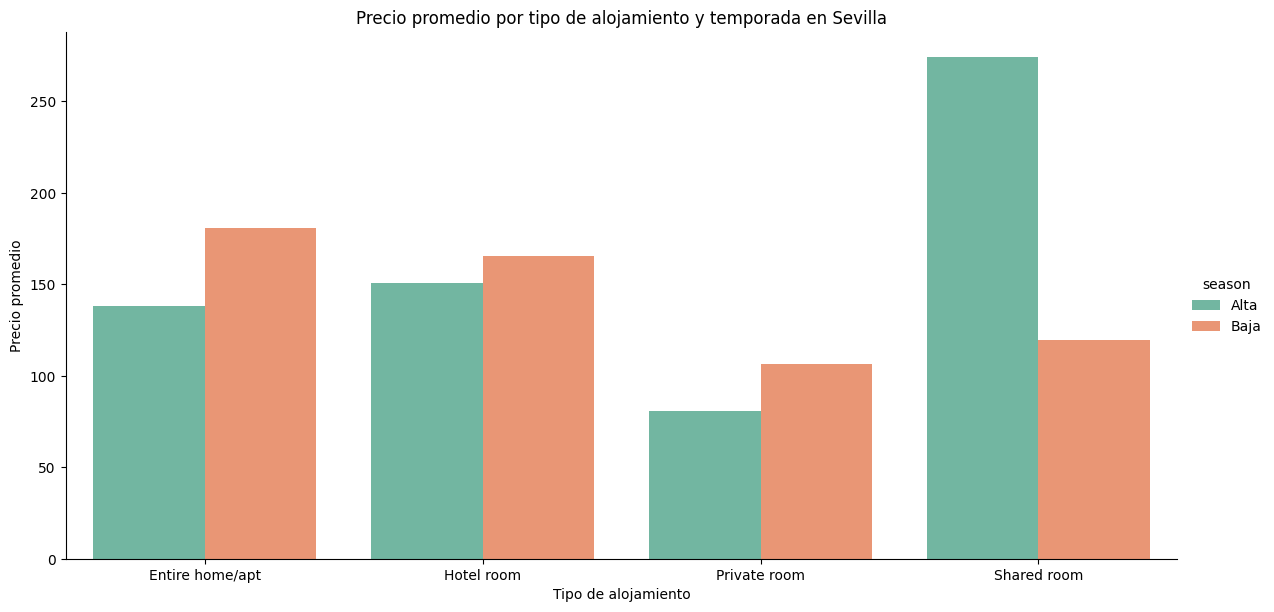

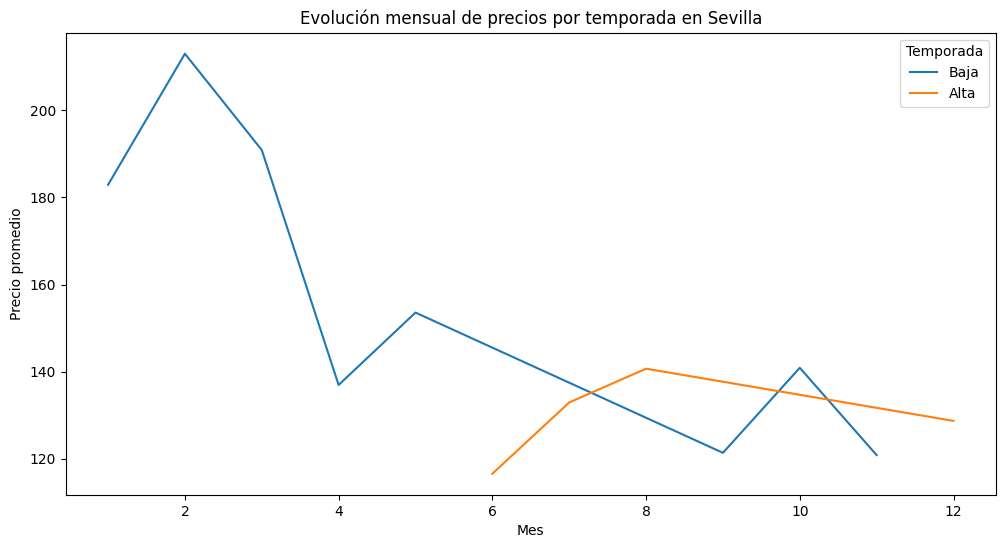

C:\Users\alber\AppData\Local\Temp\ipykernel_15008\3167126616.py:289: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='season', y='price', palette='coolwarm')


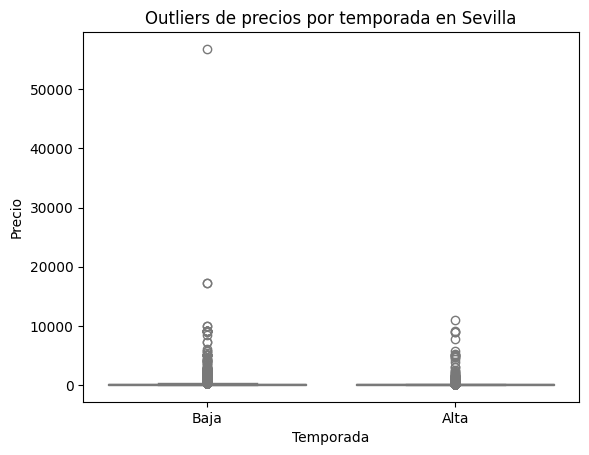

En Sevilla, los precios en temporadas altas son significativamente diferentes de los precios en temporadas bajas (T-test).
La prueba no paramétrica confirma diferencias significativas en los precios en Sevilla (Mann-Whitney U).


In [65]:

# Cargar los datos
file_path = r'C:\Users\alber\OneDrive\Documentos\GitHub\DS_ONLINE_THEBRIDGE_ATC\Project_Break_EDA\DataSetConjunto'
data = pd.read_csv(file_path)
# =============================
# 1. Exploración inicial
# =============================
# Verificar las primeras filas
data.head()

# Resumen de columnas y tipos de datos
data.info()

# Descripción estadística general
data.describe()

# =============================
# 2. Limpieza de datos
# =============================
# Identificar valores nulos
missing_values = data.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

# Rellenar valores nulos en columnas importantes
data['price'] = data['price'].fillna(data['price'].median())
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

# Eliminar columnas innecesarias (si aplica)
data = data.drop(columns=['license'], errors='ignore')

# Crear columnas adicionales útiles:
data['month'] = pd.to_datetime(data['last_review'], errors='coerce').dt.month

# =============================
# 3. Análisis exploratorio por hipótesis
# =============================

# 3a. Estacionalidad de precios
# Promedio de precios por mes y ciudad
price_by_month = data.groupby(['state', 'month'])['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_by_month, x='month', y='price', hue='state', marker='o')
plt.title('Precio promedio por mes y ciudad')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.legend(title='Ciudad')
plt.show()

# 3b. Comparación de precios entre ciudades
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='state', y='price')
plt.title('Distribución de precios por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio')
plt.show()

# 3c. Tipo de alojamiento
room_type_stats = data.groupby(['state', 'room_type'])['price'].mean().reset_index()
sns.catplot(data=room_type_stats, x='room_type', y='price', hue='state', kind='bar', height=6, aspect=2)
plt.title('Precio promedio por tipo de alojamiento y ciudad')
plt.xlabel('Tipo de alojamiento')
plt.ylabel('Precio promedio')
plt.show()

# 3d. Popularidad de barrios
popular_neighbourhoods = data.groupby(['state', 'neighbourhood'])['number_of_reviews'].sum().reset_index()
popular_neighbourhoods = popular_neighbourhoods.sort_values(by='number_of_reviews', ascending=False).groupby('state').head(10)
sns.barplot(data=popular_neighbourhoods, y='neighbourhood', x='number_of_reviews', hue='state')
plt.title('Barrios más populares por ciudad (según reseñas)')
plt.xlabel('Número de reseñas')
plt.ylabel('Barrio')
plt.show()

# =============================
# 4. Profundización en el análisis
# =============================

# 4a. Distribución porcentual de tipos de alojamiento
room_type_distribution = data.groupby(['state', 'room_type']).size().reset_index(name='count')
room_type_distribution['percentage'] = room_type_distribution.groupby('state')['count'].transform(lambda x: x / x.sum() * 100)
sns.barplot(data=room_type_distribution, x='state', y='percentage', hue='room_type')
plt.title('Distribución porcentual de tipos de alojamiento por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Porcentaje')
plt.show()

# 4b. Relación entre disponibilidad y precio
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='availability_365', y='price', hue='state', alpha=0.5)
plt.title('Relación entre disponibilidad y precio por ciudad')
plt.xlabel('Días disponibles al año')
plt.ylabel('Precio')
plt.legend(title='Ciudad')
plt.show()

# 4c. Hosts más activos
top_hosts = data.groupby('host_id').agg(total_listings=('id', 'count'), avg_price=('price', 'mean')).reset_index()
top_hosts = top_hosts.sort_values(by='total_listings', ascending=False).head(10)
print("Top 10 Hosts más activos:\n", top_hosts)

# 4d. Reseñas por mes
reviews_by_month = data.groupby(['state', 'month'])['number_of_reviews'].sum().reset_index()
sns.lineplot(data=reviews_by_month, x='month', y='number_of_reviews', hue='state', marker='o')
plt.title('Cantidad de reseñas por mes y ciudad')
plt.xlabel('Mes')
plt.ylabel('Número de reseñas')
plt.legend(title='Ciudad')
plt.show()

# 4e. Geolocalización de alojamientos Barcelona
barcelona_data = data[data['state'] == 'Barcelona']
map_barcelona = folium.Map(location=[barcelona_data['latitude'].mean(), barcelona_data['longitude'].mean()], zoom_start=12)
for _, row in barcelona_data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(map_barcelona)
map_barcelona.save('map_barcelona.html')

# 4e. Geolocalización de alojamientos Madrid
madrid_data = data[data['state'] == 'Madrid']
map_madrid = folium.Map(location=[madrid_data['latitude'].mean(), madrid_data['longitude'].mean()], zoom_start=12)
for _, row in madrid_data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(map_madrid)
map_madrid.save('map_madrid.html')

# 4e. Geolocalización de alojamientos Sevilla
sevilla_data = data[data['state'] == 'Sevilla']
map_sevilla = folium.Map(location=[sevilla_data['latitude'].mean(), sevilla_data['longitude'].mean()], zoom_start=12)
for _, row in sevilla_data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(map_sevilla)
map_sevilla.save('map_sevilla.html')

# 4f. Outliers en precios
sns.boxplot(data=data, x='state', y='price')
plt.title('Outliers de precios por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio')
plt.show()

# 4g. Comparación por temporadas
high_season_months = [6, 7, 8, 12]
data['season'] = data['month'].apply(lambda x: 'Alta' if x in high_season_months else 'Baja')
season_prices = data.groupby(['state', 'season'])['price'].mean().reset_index()
sns.barplot(data=season_prices, x='state', y='price', hue='season')
plt.title('Precio promedio por temporada y ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio promedio')
plt.show()

# =============================
# Ejecución del análisis por ciudad
# =============================
for city in ['Barcelona', 'Madrid', 'Sevilla']:
    analyze_city(city)

In [66]:
# Conecta a una base de datos SQLite (puede ser un archivo o en memoria)
conn = sqlite3.connect('df_concatenado_total')  # Cambia el nombre si lo prefieres
# Carga el DataFrame en una tabla llamada 'data'
df_concatenado_total.to_sql('data', conn, if_exists='replace', index=False)

print("Datos cargados en la base de datos SQLite.")

def run_query(query, connection):
    """
    Ejecuta una consulta SQL y devuelve los resultados en un DataFrame de pandas.
    """
    return pd.read_sql(query, connection)

Datos cargados en la base de datos SQLite.


In [67]:
# =============================
# 4. SQL: Consultas estructuradas
# =============================

# Consulta para estacionalidad:
query = '''
SELECT state, month, AVG(price) as avg_price
FROM data
GROUP BY state, month
ORDER BY month;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,month,avg_price
0,Barcelona,December,126.494083
1,Madrid,December,129.016058
2,Sevilla,December,126.494083
3,Barcelona,June,196.379419
4,Madrid,June,137.353932
5,Sevilla,June,135.882729
6,Barcelona,March,146.488264
7,Madrid,March,137.574294
8,Sevilla,March,228.041796
9,Barcelona,September,168.633575


In [68]:
# Comparación entre ciudades:
query = '''
SELECT state, AVG(price) as avg_price, COUNT(id) as total_listings
FROM data
GROUP BY state;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,avg_price,total_listings
0,Barcelona,159.179998,75247
1,Madrid,136.081448,105471
2,Sevilla,153.163467,33919


In [69]:
# Tipo de alojamiento:
query = '''
SELECT state, room_type, AVG(price) as avg_price
FROM data
GROUP BY state, room_type;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,room_type,avg_price
0,Barcelona,Entire home/apt,194.109269
1,Barcelona,Hotel room,196.082508
2,Barcelona,Private room,86.061618
3,Barcelona,Shared room,73.608519
4,Madrid,Entire home/apt,162.013813
5,Madrid,Hotel room,250.770318
6,Madrid,Private room,75.472552
7,Madrid,Shared room,107.692863
8,Sevilla,Entire home/apt,170.754776
9,Sevilla,Hotel room,166.112426


In [70]:
# Popularidad de barrios:
query = '''
SELECT state, neighbourhood, SUM(number_of_reviews) as total_reviews
FROM data
GROUP BY state, neighbourhood
ORDER BY total_reviews DESC
LIMIT 10;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,neighbourhood,total_reviews
0,Madrid,Embajadores,756509
1,Madrid,Universidad,571160
2,Barcelona,la Dreta de l'Eixample,562586
3,Madrid,Palacio,490336
4,Madrid,Sol,454452
5,Madrid,Cortes,326041
6,Barcelona,la Sagrada Família,282353
7,Madrid,Justicia,274716
8,Barcelona,la Vila de Gràcia,265675
9,Barcelona,el Poble Sec,231172


In [71]:
# =============================
# 5. Consultas SQL para los análisis
# =============================
# Estacionalidad:
query = '''
SELECT state, month, AVG(price) as avg_price
FROM data
GROUP BY state, month
ORDER BY month;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,month,avg_price
0,Barcelona,December,126.494083
1,Madrid,December,129.016058
2,Sevilla,December,126.494083
3,Barcelona,June,196.379419
4,Madrid,June,137.353932
5,Sevilla,June,135.882729
6,Barcelona,March,146.488264
7,Madrid,March,137.574294
8,Sevilla,March,228.041796
9,Barcelona,September,168.633575


In [72]:
# Comparación entre ciudades:
query = '''
SELECT state, AVG(price) as avg_price, COUNT(id) as total_listings
FROM data
GROUP BY state;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,avg_price,total_listings
0,Barcelona,159.179998,75247
1,Madrid,136.081448,105471
2,Sevilla,153.163467,33919


In [73]:
# Tipo de alojamiento:
query = '''
SELECT state, room_type, AVG(price) as avg_price
FROM data
GROUP BY state, room_type;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,room_type,avg_price
0,Barcelona,Entire home/apt,194.109269
1,Barcelona,Hotel room,196.082508
2,Barcelona,Private room,86.061618
3,Barcelona,Shared room,73.608519
4,Madrid,Entire home/apt,162.013813
5,Madrid,Hotel room,250.770318
6,Madrid,Private room,75.472552
7,Madrid,Shared room,107.692863
8,Sevilla,Entire home/apt,170.754776
9,Sevilla,Hotel room,166.112426


In [74]:
# Popularidad de barrios:
query = '''
SELECT state, neighbourhood, SUM(number_of_reviews) as total_reviews
FROM data
GROUP BY state, neighbourhood
ORDER BY total_reviews DESC
LIMIT 10;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,neighbourhood,total_reviews
0,Madrid,Embajadores,756509
1,Madrid,Universidad,571160
2,Barcelona,la Dreta de l'Eixample,562586
3,Madrid,Palacio,490336
4,Madrid,Sol,454452
5,Madrid,Cortes,326041
6,Barcelona,la Sagrada Família,282353
7,Madrid,Justicia,274716
8,Barcelona,la Vila de Gràcia,265675
9,Barcelona,el Poble Sec,231172


In [75]:
# Hosts más activos:
query = '''
SELECT host_id, COUNT(id) as total_listings, AVG(price) as avg_price
FROM data
GROUP BY host_id
ORDER BY total_listings DESC
LIMIT 10;
'''
df_resultado = run_query(query, conn)
df_resultado

,host_id,total_listings,avg_price
0,346367515,2938,157.273368
1,357946540,1623,32.267593
2,377605855,1192,209.118317
3,291253690,1154,176.025986
4,32037490,1086,207.392066
5,1447144,957,480.306490
6,4459553,929,254.749175
7,518713670,893,66.329193
8,434208714,777,130.978947
9,438136382,763,134.013850


In [76]:
# Temporadas:
query = '''
SELECT state, CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END as season, AVG(price) as avg_price
FROM data
GROUP BY state, season;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,season,avg_price
0,Barcelona,Baja,159.179998
1,Madrid,Baja,136.081448
2,Sevilla,Baja,153.163467


In [77]:
query = '''
SELECT season, AVG(price) AS avg_price
FROM (
    SELECT *, 
           CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
    FROM data
    WHERE state = 'Barcelona' 
) AS temp
GROUP BY season;
'''
df_resultado = run_query(query, conn)
df_resultado

,season,avg_price
0,Baja,159.179998


In [78]:
query = '''
SELECT season, AVG(price) AS avg_price
FROM (
    SELECT *, 
           CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
    FROM data
    WHERE state = 'Madrid'  
) AS temp
GROUP BY season;
'''
df_resultado = run_query(query, conn)
df_resultado

,season,avg_price
0,Baja,136.081448


In [79]:
query = '''
SELECT season, AVG(price) AS avg_price
FROM (
    SELECT *, 
           CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
    FROM data
    WHERE state = 'Sevilla'
) AS temp
GROUP BY season;
'''
df_resultado = run_query(query, conn)
df_resultado

,season,avg_price
0,Baja,153.163467


In [80]:

query = '''
SELECT season, AVG(price) AS avg_price
FROM (
    SELECT *, 
           CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
    FROM data
    WHERE state = 'Barcelona'  -- Cambiar a 'Madrid' o 'Sevilla' para otras ciudades
) AS temp
GROUP BY season;
'''
df_resultado = run_query(query, conn)
df_resultado


,season,avg_price
0,Baja,159.179998


In [81]:
query = '''
SELECT season, room_type, AVG(price) AS avg_price
FROM (
    SELECT *, 
           CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
    FROM data
    WHERE state = 'Madrid'  -- Cambiar a 'Barcelona' o 'Sevilla'
) AS temp
GROUP BY season, room_type;
'''
df_resultado = run_query(query, conn)
df_resultado

,season,room_type,avg_price
0,Baja,Entire home/apt,162.013813
1,Baja,Hotel room,250.770318
2,Baja,Private room,75.472552
3,Baja,Shared room,107.692863


In [82]:
query = '''
SELECT month, season, AVG(price) AS avg_price
FROM (
    SELECT *, 
           CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
    FROM data
    WHERE state = 'Barcelona'  -- Cambiar a 'Madrid' o 'Barcelona'
) AS temp
GROUP BY month, season
ORDER BY month;
'''
df_resultado = run_query(query, conn)
df_resultado

,month,season,avg_price
0,December,Baja,126.494083
1,June,Baja,196.379419
2,March,Baja,146.488264
3,September,Baja,168.633575


In [83]:
query = '''
SELECT month, season, AVG(price) AS avg_price
FROM (
    SELECT *, 
           CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
    FROM data
    WHERE state = 'Sevilla'  -- Cambiar a 'Madrid' o 'Barcelona'
) AS temp
GROUP BY month, season
ORDER BY month;
'''
df_resultado = run_query(query, conn)
df_resultado

,month,season,avg_price
0,December,Baja,126.494083
1,June,Baja,135.882729
2,March,Baja,228.041796
